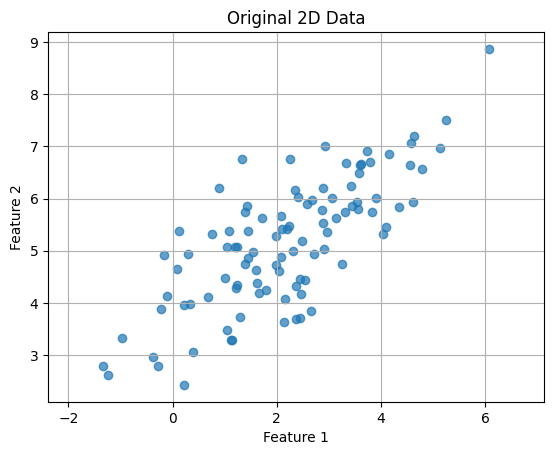

Covariance Matrix:
[[2.28165958 1.40082016]
 [1.40082016 1.50064765]]
Eigenvalues:
[3.34538606 0.43692116]
Eigenvectors:
[[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


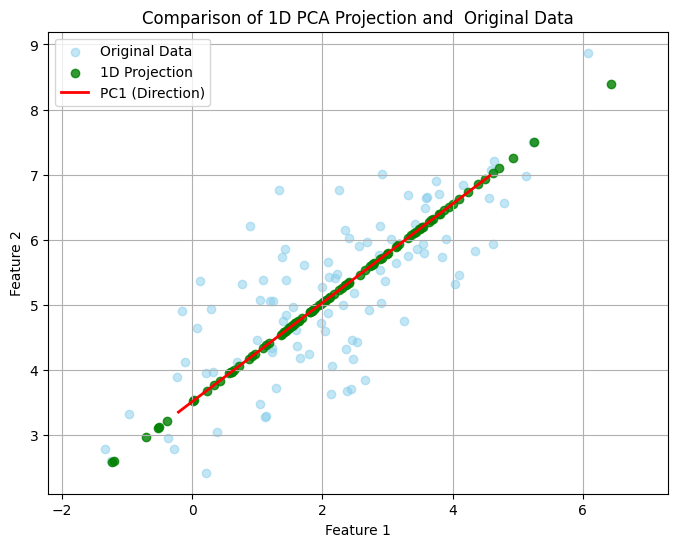

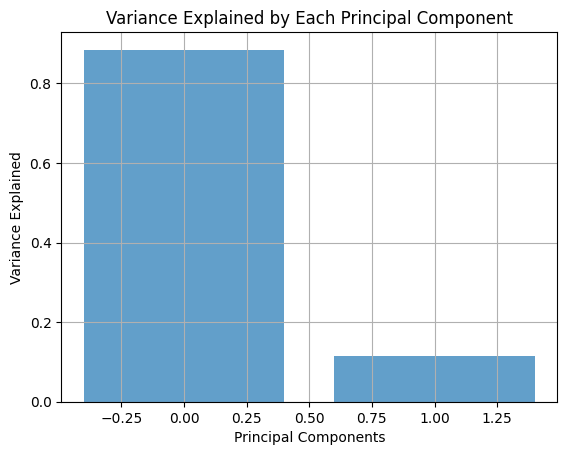

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#1
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()


#2
X_centered = X - np.mean(X, axis=0)

# Calculate and store the mean of X
X_mean = np.mean(X, axis=0) # This line calculates the mean of X and stores it in X_mean


#3
cov_matrix = np.cov(X_centered.T)
print("Covariance Matrix:")
print(cov_matrix)


#4
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)


#5
pc1 = eigenvectors[:, 0]
X_projected = X_centered.dot(pc1)

#6
X_proj_2D = np.outer(X_projected, pc1) + X_mean
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data', color='skyblue')
plt.scatter(X_proj_2D[:, 0], X_proj_2D[:, 1], alpha=0.8, label='1D Projection', color='green')
pc1_line = np.array([X_mean - 3 * pc1, X_mean + 3 * pc1])
plt.plot(pc1_line[:, 0], pc1_line[:, 1], color='red', linewidth=2, label='PC1 (Direction)')
plt.title("Comparison of 1D PCA Projection and  Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


#7
explained_variance = eigenvalues / np.sum(eigenvalues)
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7)
plt.title("Variance Explained by Each Principal Component")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

Shape of X: (1797, 64)
Shape of y: (1797,)
Shape of 2D t-SNE embedding: (1797, 2)


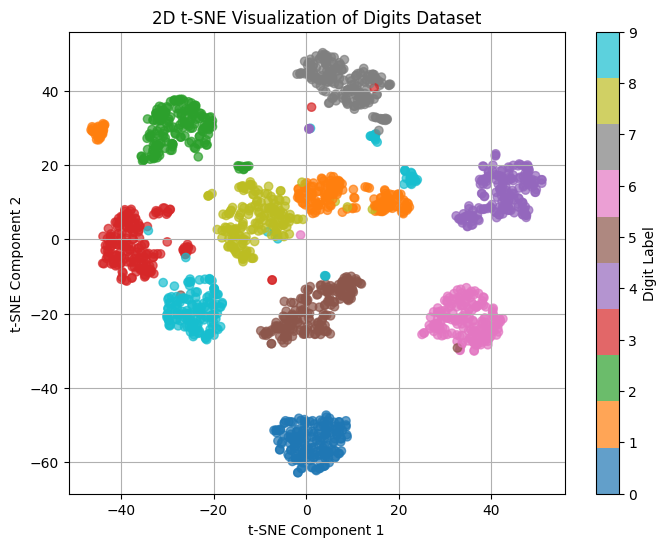

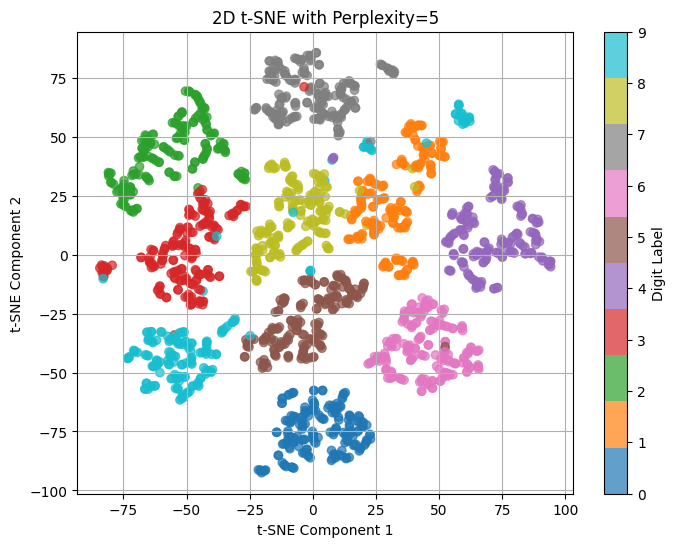

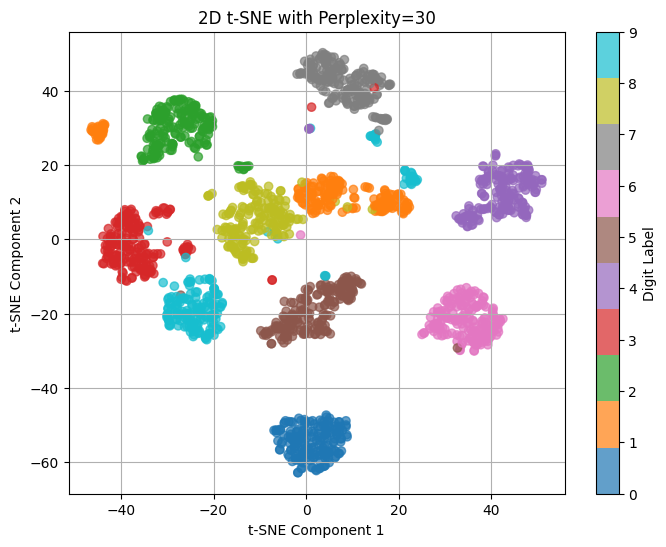

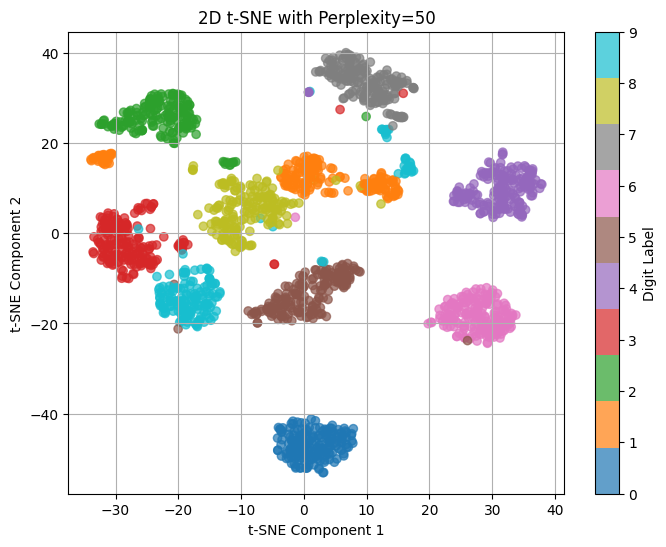

In [13]:
# Using t-SNE to visualize how it separates points from different classes in 2D space:

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


digits = load_digits()
X = digits.data
y = digits.target

#1
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


#2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

print("Shape of 2D t-SNE embedding:", X_tsne.shape)  # Should be (1797, 2)

#3
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.title("2D t-SNE Visualization of Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Digit Label")
plt.grid(True)
plt.show()

#4
perplexities = [5, 30, 50]

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Plot for each perplexity value
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.title(f"2D t-SNE with Perplexity={p}")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(label="Digit Label")
    plt.grid(True)
    plt.show()
